In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/metricobjects/master/init.py
import init; init.init(force_download=False);

In [1]:
import numpy as np
import tensorflow as tf
import itertools
from local.lib import metricobjects as mo
from local.lib import mlutils
import matplotlib.pyplot as plt
%matplotlib inline
tf.__version__

'2.1.0'

## Inspect metric object

### create a model

In [2]:
dim_u = 2
def get_model(activation="sigmoid", dim_u=2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=dim_u, activation=activation))
    model.add(tf.keras.layers.Dense(5,  activation=activation))
    return model

### the object to extract metric objects


In [3]:
tmo = mo.TensorFlowMetricObjects(get_model())

### some random data

In [4]:
tu = tf.Variable(np.random.normal(size=(3,dim_u)), dtype=np.float32)
tu

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.3194569 , -1.0472758 ],
       [-0.84310657,  0.49978587],
       [-1.1389046 ,  1.0862089 ]], dtype=float32)>

### metric objects at each data point


In [5]:
tmo.get_metric_tensor(tu)

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[0.00072511, 0.00069395],
        [0.00069395, 0.00371905]],

       [[0.00059624, 0.0005795 ],
        [0.0005795 , 0.00356745]],

       [[0.00077415, 0.00072972],
        [0.00072972, 0.00378214]]], dtype=float32)>

In [6]:
tmo.get_jacobian(tu)

<tf.Tensor: shape=(3, 5, 2), dtype=float32, numpy=
array([[[-0.00142854,  0.00604191],
        [ 0.00463083, -0.0256145 ],
        [ 0.0252174 ,  0.02197478],
        [-0.00496514,  0.01000233],
        [-0.00640713, -0.04943183]],

       [[-0.00092225,  0.00630075],
        [ 0.00435478, -0.0251811 ],
        [ 0.02312395,  0.02074008],
        [-0.00375073,  0.0105539 ],
        [-0.00525701, -0.04849876]],

       [[-0.00161213,  0.00590063],
        [ 0.0047893 , -0.02559123],
        [ 0.02598418,  0.02215664],
        [-0.00530575,  0.00961155],
        [-0.00672908, -0.05009106]]], dtype=float32)>

In [7]:
tmo.get_riemann_curvature_tensor(tu)

tf failed, retrying


<tf.Tensor: shape=(3, 2, 2, 2, 2), dtype=float32, numpy=
array([[[[[ 0.0000000e+00, -3.7431205e-04],
          [ 3.7431205e-04,  0.0000000e+00]],

         [[ 0.0000000e+00, -2.0060614e-03],
          [ 2.0060614e-03,  0.0000000e+00]]],


        [[[ 0.0000000e+00,  3.9112649e-04],
          [-3.9112646e-04,  0.0000000e+00]],

         [[ 0.0000000e+00,  3.7432334e-04],
          [-3.7432334e-04,  0.0000000e+00]]]],



       [[[[ 0.0000000e+00, -9.7357482e-04],
          [ 9.7357482e-04,  0.0000000e+00]],

         [[ 0.0000000e+00, -5.9934626e-03],
          [ 5.9934622e-03,  0.0000000e+00]]],


        [[[ 0.0000000e+00,  1.0017027e-03],
          [-1.0017027e-03,  0.0000000e+00]],

         [[ 0.0000000e+00,  9.7358110e-04],
          [-9.7358099e-04,  0.0000000e+00]]]],



       [[[[ 0.0000000e+00, -9.9453464e-06],
          [ 9.9453464e-06,  0.0000000e+00]],

         [[ 0.0000000e+00, -5.1580355e-05],
          [ 5.1580355e-05,  0.0000000e+00]]],


        [[[ 0.0000000e+00,  1

In [8]:
tmo.get_ricci_scalar(tu)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.0788085 , -3.360086  , -0.02727543], dtype=float32)>

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:51 Time:  0:00:51


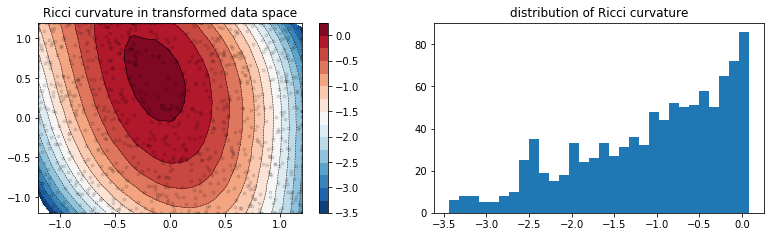

In [9]:
tmo.plot_curvature_for_2D_input_flat_manifold()

## curvature for other models

two initialized instances of the same model (random weights as assigned by TF)

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:51 Time:  0:00:51


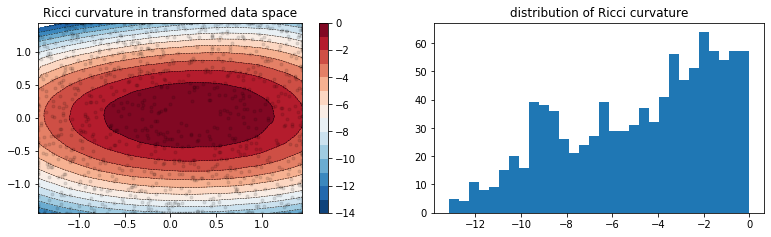

In [10]:
tmo = mo.TensorFlowMetricObjects(get_model())
tmo.plot_curvature_for_2D_input_flat_manifold()

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:52 Time:  0:00:52


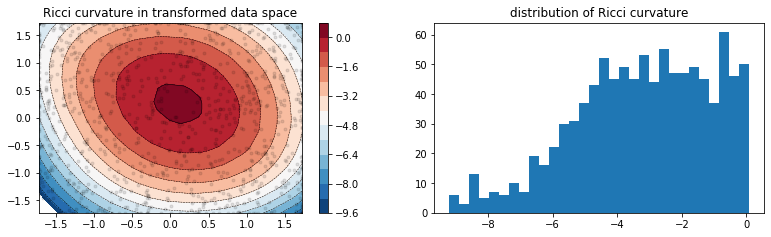

In [11]:
tmo = mo.TensorFlowMetricObjects(get_model())
tmo.plot_curvature_for_2D_input_flat_manifold()

**linear activations** (no curvature)

100% (50 of 50) |########################| Elapsed Time: 0:00:14 Time:  0:00:14
/home/rlx/Dropbox/working/tensors/local/lib/metricobjects.py:313: UserWarning: No contour levels were found within the data range.
  ax1.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')


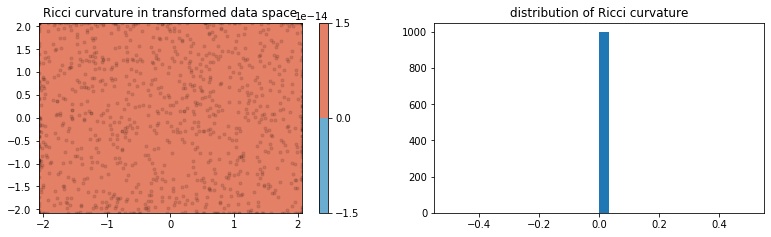

In [12]:
tmo = mo.TensorFlowMetricObjects(get_model(activation="linear"))
tmo.plot_curvature_for_2D_input_flat_manifold()

**eLU activations** 

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:52 Time:  0:00:52


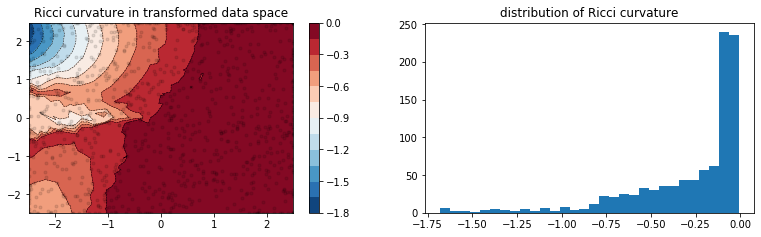

In [13]:
tmo = mo.TensorFlowMetricObjects(get_model(activation="elu"))
tmo.plot_curvature_for_2D_input_flat_manifold()

**with ReLU activations** 

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:46 Time:  0:00:46
/home/rlx/Dropbox/working/tensors/local/lib/metricobjects.py:313: UserWarning: No contour levels were found within the data range.
  ax1.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')


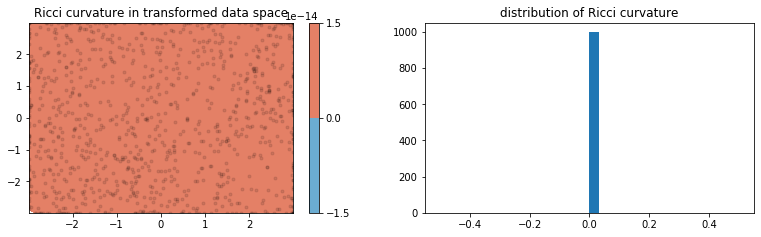

In [14]:
tmo = mo.TensorFlowMetricObjects(get_model(activation="relu"))
tmo.plot_curvature_for_2D_input_flat_manifold()

**larger output manifold**

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:51 Time:  0:00:51


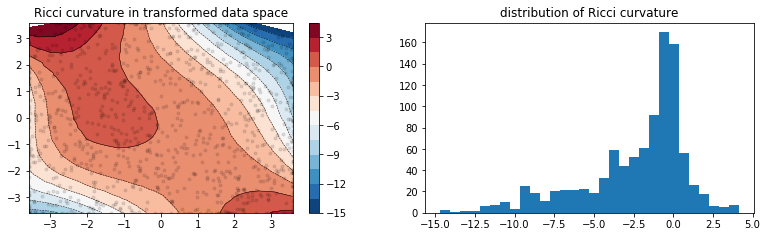

In [15]:
def get_model2(activation="sigmoid", dim_u=2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=dim_u, activation=activation))
    model.add(tf.keras.layers.Dense(10,  activation=activation))
    return model

tmo = mo.TensorFlowMetricObjects(get_model2())
tmo.plot_curvature_for_2D_input_flat_manifold()

**more layers, more neurons**

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:56 Time:  0:00:56


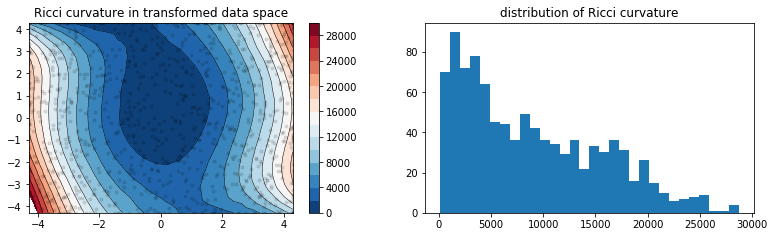

In [16]:
def get_model3(activation="sigmoid", dim_u=2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=dim_u, activation=activation))
    model.add(tf.keras.layers.Dense(100, input_dim=dim_u, activation=activation))
    model.add(tf.keras.layers.Dense(100, input_dim=dim_u, activation=activation))
    model.add(tf.keras.layers.Dense(5,  activation=activation))
    return model
tmo = mo.TensorFlowMetricObjects(get_model3())
tmo.plot_curvature_for_2D_input_flat_manifold()

## custom transformations (without tensorflow)
**a unit sphere** (constant curvature=2)

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:54 Time:  0:00:54


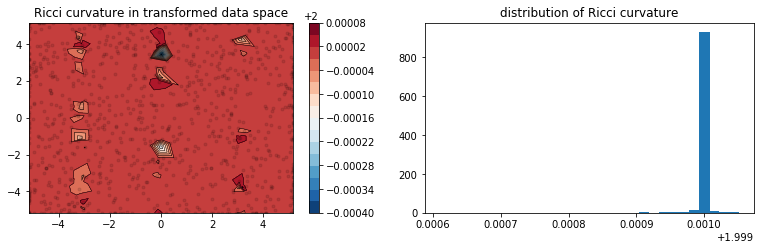

In [17]:
class Sphere:
    def __init__(self):
        self.input = np.r_[[[0,0]]]
    def __call__(self, u):
        t,p = u[:,0], u[:,1]
        x = tf.sin(t)*tf.cos(p)
        y = tf.sin(t)*tf.sin(p) 
        z = tf.cos(t)
        r = tf.transpose(tf.stack([x,y,z]))
        return r    
tmo = mo.TensorFlowMetricObjects(Sphere())
tmo.plot_curvature_for_2D_input_flat_manifold()

**a paraboloid**

large curvature at the vortex, tends to zero further away from the vortex

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:49 Time:  0:00:49


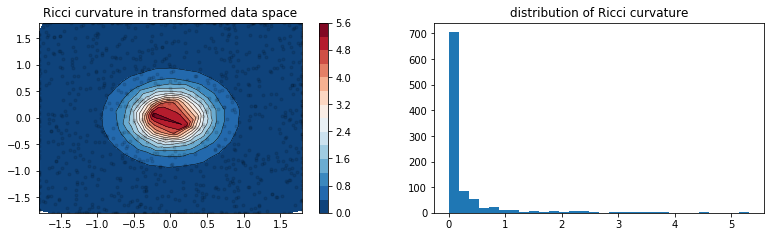

In [20]:
class Paraboloid:
    def __init__(self):
        self.input = np.r_[[[0,0]]]
    def __call__(self, u):
        t,p = u[:,0], u[:,1]
        x = t
        y = p
        z = t**2+p**2
        r = tf.transpose(tf.stack([x,y,z]))
        return r    
tmo = mo.TensorFlowMetricObjects(Paraboloid())
tmo.plot_curvature_for_2D_input_flat_manifold(x_range=[-1.5,1.5], y_range=[-1.5,1.5])

## trained models

on synthetic data

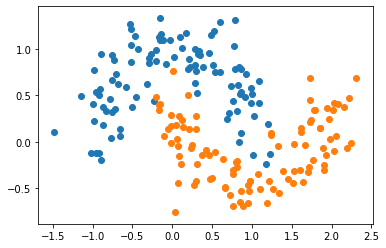

In [6]:
from sklearn.datasets import make_moons, make_circles
X,y = make_moons(200, noise=0.2)
X = X.astype(np.float32)
plt.scatter(X[:,0][y==0], X[:,1][y==0], label="class 0")
plt.scatter(X[:,0][y==1], X[:,1][y==1], label="class 1")

In [10]:
def get_model4(activation="sigmoid", layer_sizes=[10,20], dim_u=2):
    assert len(layer_sizes)>=2, "must have at least two layers"
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(layer_sizes[0], input_dim=dim_u, activation=activation))
    
    for s in layer_sizes[1:-1]:
        model.add(tf.keras.layers.Dense(s,  activation=activation))
        
    # last layer is for features
    model.add(tf.keras.layers.Dense(layer_sizes[-1],  activation=activation, name="features"))
    model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))
    # For a binary classification problem
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])    
    return model



In [11]:
model = get_model4(activation='elu')
model.fit(X,y, epochs=200, batch_size=5, verbose=0)
model.evaluate(X,y)

200/200 [==============================] - 0s 282us/sample - loss: 0.0612 - accuracy: 0.9800


[0.06122613728046417, 0.98]

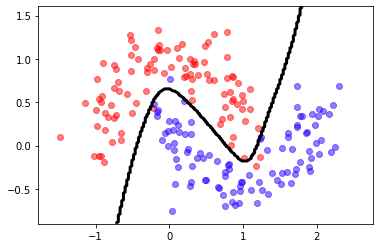

In [12]:
predict = lambda X: (model.predict(X)>0.5).astype(int)[:,0]
mlutils.plot_2Ddata_with_boundary(predict, X, y)

**plot curvature at the features layer** (just before the single neuron output)

In [7]:
features_layer = model.get_layer(name='features')
features_model = tf.keras.models.Model(inputs=model.input, outputs=features_layer.output)

N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:51 Time:  0:00:51


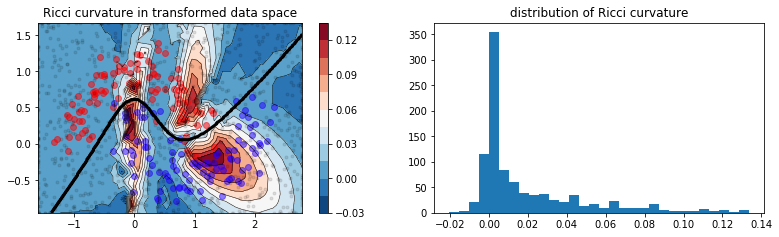

In [8]:
tmo = mo.TensorFlowMetricObjects(features_model)
minmax = np.r_[[np.min(X, axis=0), np.max(X, axis=0)]]
ax = tmo.plot_curvature_for_2D_input_flat_manifold(x_range=minmax[:,0], y_range=minmax[:,1])
mlutils.plot_2Ddata_with_boundary(predict, X, y, ax=ax)

In [14]:
def fit_plot_model(model, X, y, epochs=200, batch_size=5, remove_percentile=3):
    print ("fitting...")
    model.fit(X,y, epochs=epochs, batch_size=5, verbose=0)
    model.evaluate(X,y)

    features_layer = model.get_layer(name='features')
    features_model = tf.keras.models.Model(inputs=model.input, outputs=features_layer.output)
    print ("plotting...")
    tmo = mo.TensorFlowMetricObjects(features_model)
    minmax = np.r_[[np.min(X, axis=0), np.max(X, axis=0)]]
    ax = tmo.plot_curvature_for_2D_input_flat_manifold(x_range=minmax[:,0], y_range=minmax[:,1], 
                                                       remove_percentile=remove_percentile)
    
    predict = lambda X: (model.predict(X)>0.5).astype(int)[:,0]    
    mlutils.plot_2Ddata_with_boundary(predict, X, y, ax=ax)

fitting...
200/200 [==============================] - 0s 290us/sample - loss: 0.1919 - accuracy: 0.9300


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:56 Time:  0:00:56


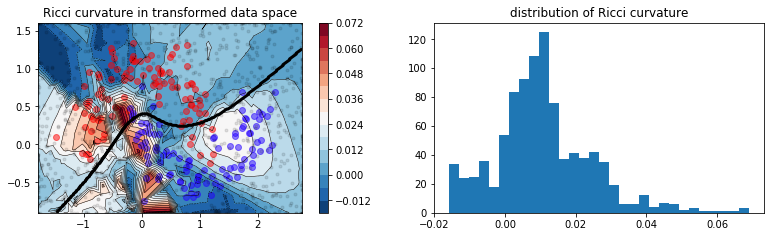

In [17]:
model = get_model4(activation='elu')
fit_plot_model(model, X, y)

fitting...
200/200 [==============================] - 0s 347us/sample - loss: 0.0945 - accuracy: 0.9700


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:04 Time:  0:01:04


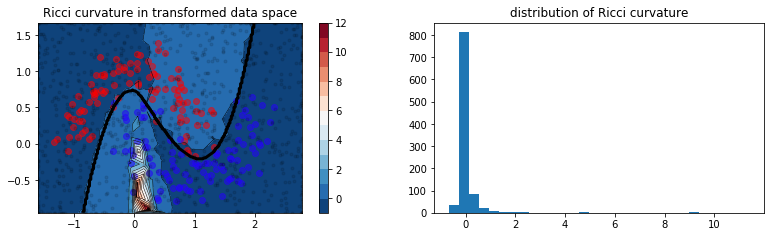

In [18]:
model = get_model4(activation='elu', layer_sizes=[3,20,1,3,5])
fit_plot_model(model, X, y)

fitting...
200/200 [==============================] - 0s 329us/sample - loss: 0.0906 - accuracy: 0.9650


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:04 Time:  0:01:04


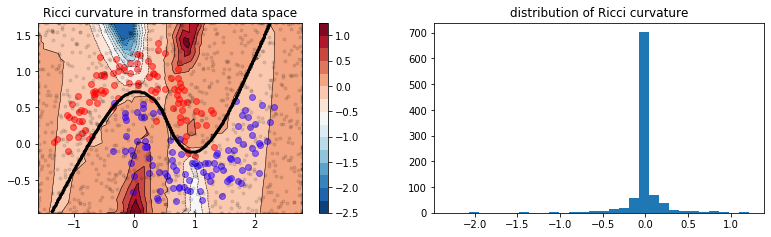

In [15]:
model = get_model4(activation='elu', layer_sizes=[3,20,1,3,5])
fit_plot_model(model, X, y)

fitting...
200/200 [==============================] - 0s 377us/sample - loss: 0.0663 - accuracy: 0.9800


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:12 Time:  0:01:12


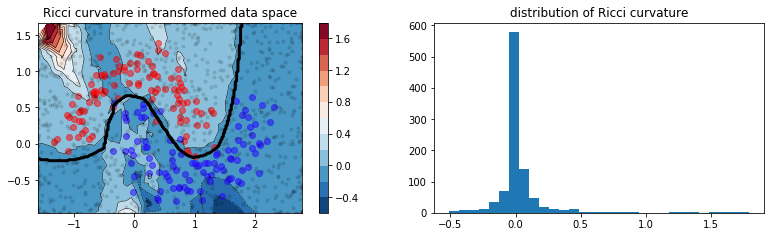

In [20]:
model = get_model4(activation='selu', layer_sizes=[3,10,10,1,10,10,5])
fit_plot_model(model, X, y)

fitting...
200/200 [==============================] - 0s 302us/sample - loss: 0.2973 - accuracy: 0.8700


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:57 Time:  0:00:57


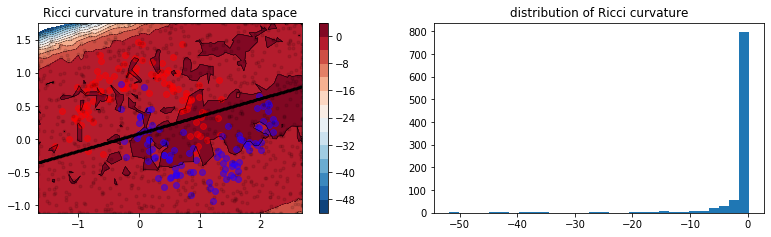

In [11]:
model = get_model4(activation='sigmoid')
fit_plot_model(model, X, y)

fitting...
200/200 [==============================] - 0s 285us/sample - loss: 0.0544 - accuracy: 0.9750


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:56 Time:  0:00:56


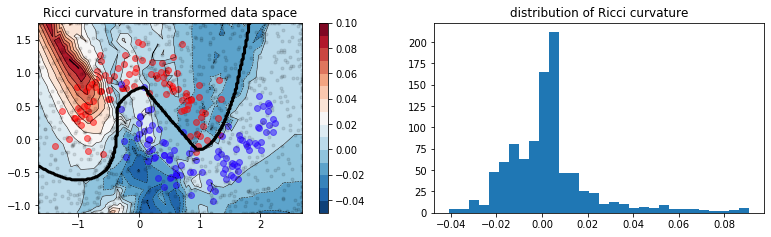

In [12]:
model = get_model4(activation='selu')
fit_plot_model(model, X, y, epochs=1000)

fitting...
200/200 [==============================] - 0s 284us/sample - loss: 0.0099 - accuracy: 1.0000


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:58 Time:  0:00:58


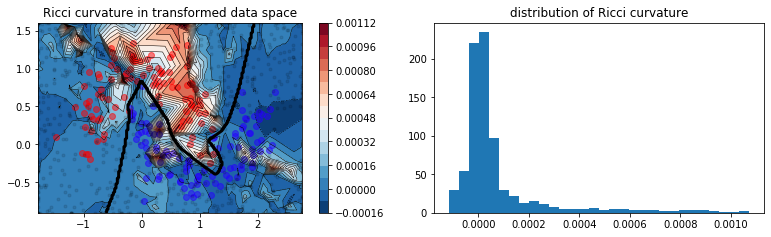

In [18]:
model = get_model4(activation='selu', layer_sizes=[100,100,100])
fit_plot_model(model, X, y, epochs=1000, remove_percentile=10)

fitting...
200/200 [==============================] - 0s 320us/sample - loss: 0.0165 - accuracy: 0.9950


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:58 Time:  0:00:58


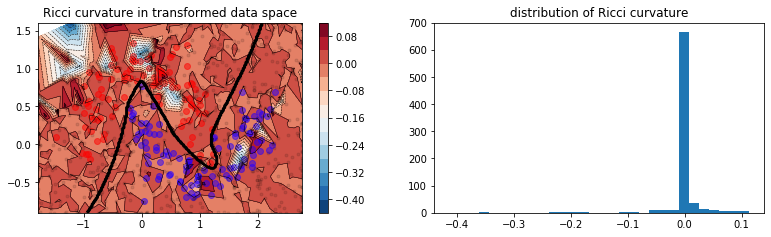

In [19]:
model = get_model4(activation='selu', layer_sizes=[100,100,2])
fit_plot_model(model, X, y, epochs=1000, remove_percentile=10)

fitting...
200/200 [==============================] - 0s 300us/sample - loss: 0.0209 - accuracy: 1.0000


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:59 Time:  0:00:59


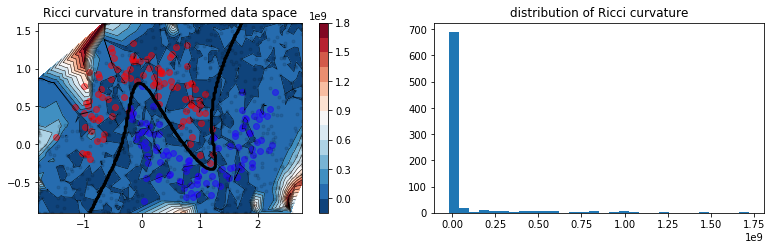

In [20]:
model = get_model4(activation='sigmoid', layer_sizes=[100,100,2])
fit_plot_model(model, X, y, epochs=1000, remove_percentile=10)

fitting...
200/200 [==============================] - 0s 279us/sample - loss: 0.2986 - accuracy: 0.8650


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:56 Time:  0:00:56


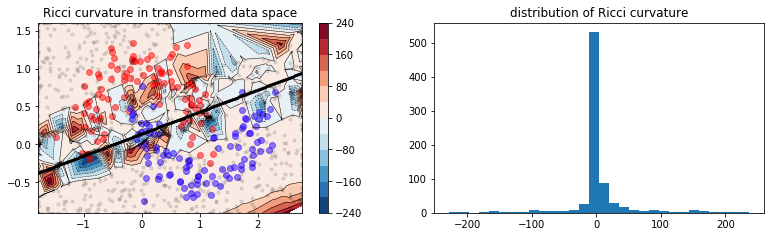

In [21]:
model = get_model4(activation='sigmoid', layer_sizes=[10,2])
fit_plot_model(model, X, y, epochs=1000, remove_percentile=10)

fitting...
200/200 [==============================] - 1s 3ms/sample - loss: 0.0286 - accuracy: 0.9900


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:54 Time:  0:00:54


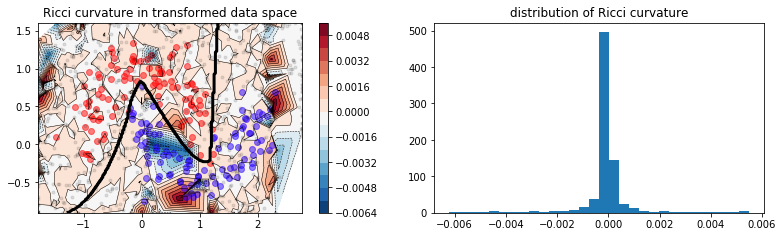

In [22]:
model = get_model4(activation='selu', layer_sizes=[10,2])
fit_plot_model(model, X, y, epochs=1000, remove_percentile=10)

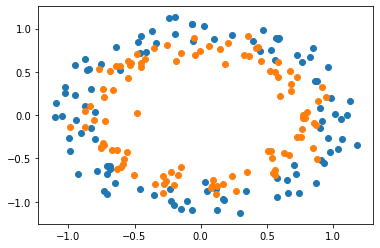

In [21]:
X,y = make_circles(200, noise=0.1)
X = X.astype(np.float32)
plt.scatter(X[:,0][y==0], X[:,1][y==0], label="class 0")
plt.scatter(X[:,0][y==1], X[:,1][y==1], label="class 1")

fitting...
200/200 [==============================] - 0s 287us/sample - loss: 0.3169 - accuracy: 0.8700


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:53 Time:  0:00:53


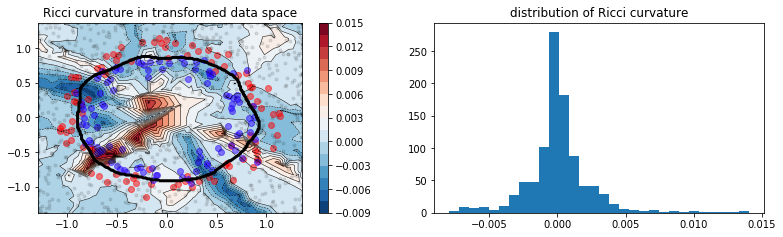

In [19]:
model = get_model4(activation='selu')
fit_plot_model(model, X, y, epochs=1000)

fitting...
200/200 [==============================] - 0s 267us/sample - loss: 0.3565 - accuracy: 0.8550


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:50 Time:  0:00:50


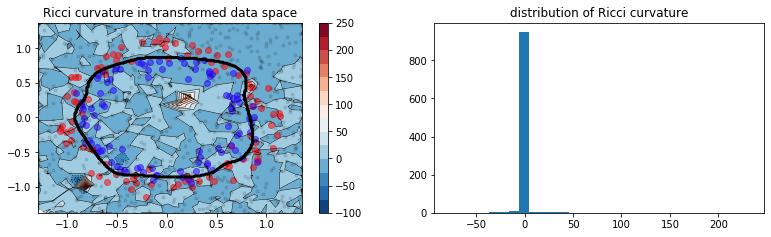

In [20]:
model = get_model4(activation='selu', layer_sizes=[10,2])
fit_plot_model(model, X, y, epochs=1000)

fitting...
200/200 [==============================] - 0s 387us/sample - loss: 0.2929 - accuracy: 0.8650


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:14 Time:  0:01:14


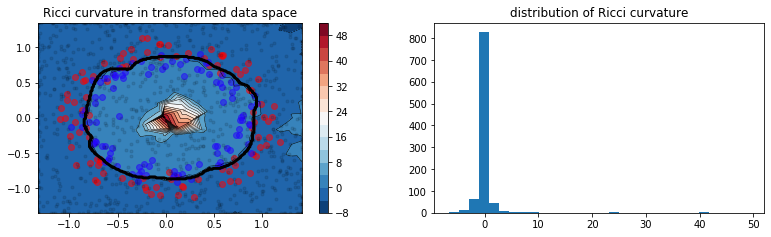

In [22]:
model = get_model4(activation='selu', layer_sizes=[3,10,10,1,10,10,5])
fit_plot_model(model, X, y)

fitting...
200/200 [==============================] - 0s 278us/sample - loss: 0.3166 - accuracy: 0.8700


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:53 Time:  0:00:53


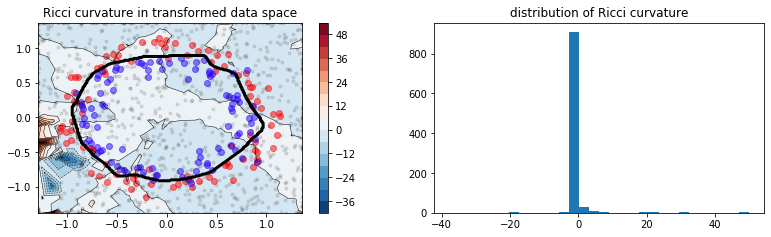

In [21]:
model = get_model4(activation='selu', layer_sizes=[10,100,5])
fit_plot_model(model, X, y, epochs=1000)

fitting...
200/200 [==============================] - 0s 274us/sample - loss: 0.6011 - accuracy: 0.6400


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:00:59 Time:  0:00:59


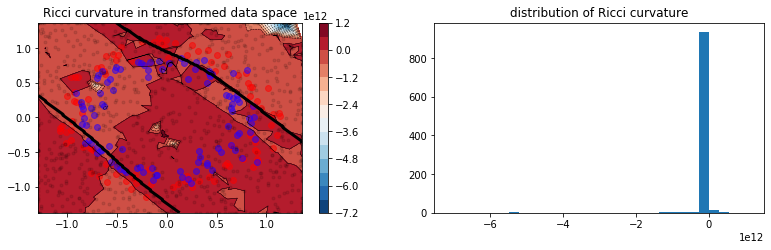

In [22]:
model = get_model4(activation='sigmoid', layer_sizes=[10,100,5])
fit_plot_model(model, X, y, epochs=1000)

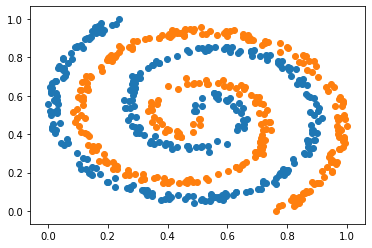

In [23]:
X, y = mlutils.twospirals(300,noise=1)
plt.scatter(X[:,0][y==0], X[:,1][y==0], label="class 0")
plt.scatter(X[:,0][y==1], X[:,1][y==1], label="class 1")

fitting...
600/600 [==============================] - 0s 164us/sample - loss: 0.5760 - accuracy: 0.6350


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:10 Time:  0:01:10


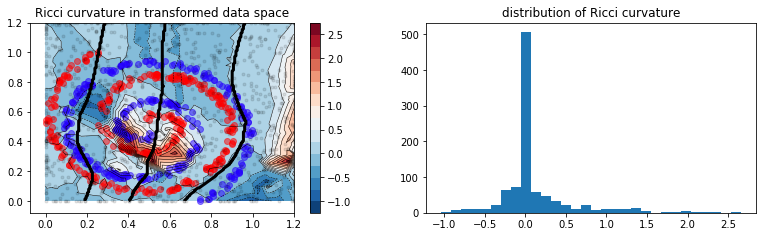

In [26]:
model = get_model4(activation='selu', layer_sizes=[3,10,10,1,10,10,5])
fit_plot_model(model, X, y)

fitting...
600/600 [==============================] - 0s 162us/sample - loss: 0.6195 - accuracy: 0.5567


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:12 Time:  0:01:12


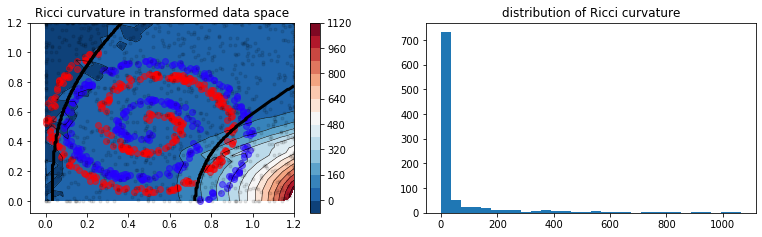

In [27]:
model = get_model4(activation='elu', layer_sizes=[3,10,10,1,10,10,5])
fit_plot_model(model, X, y)

fitting...
600/600 [==============================] - 0s 142us/sample - loss: 0.3286 - accuracy: 0.7850


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:03 Time:  0:01:03


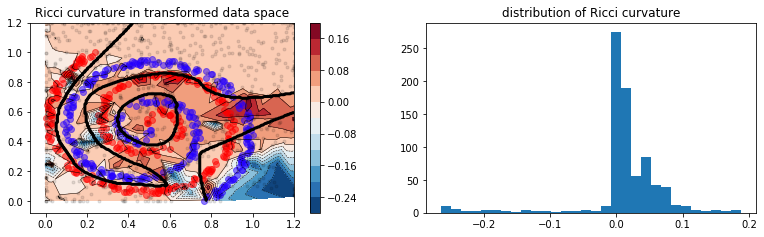

In [24]:
model = get_model4(activation='selu', layer_sizes=[50,50,2,50,5])
fit_plot_model(model, X, y, remove_percentile=10)

fitting...
600/600 [==============================] - 0s 131us/sample - loss: 0.4624 - accuracy: 0.7233


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:05 Time:  0:01:05


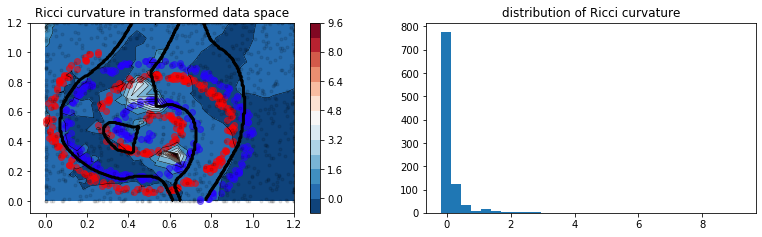

In [32]:
model = get_model4(activation='selu', layer_sizes=[50,100,10,100])
fit_plot_model(model, X, y)

fitting...
600/600 [==============================] - 0s 152us/sample - loss: 0.0333 - accuracy: 0.9900


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:14 Time:  0:01:14


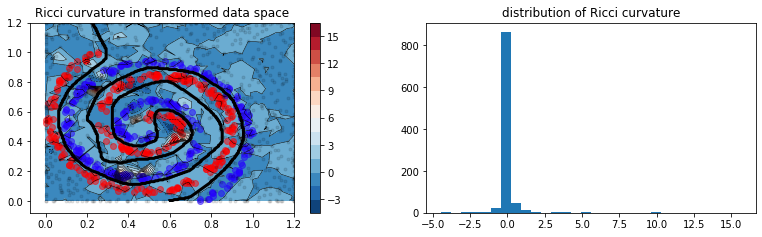

In [33]:
model = get_model4(activation='selu', layer_sizes=[50,100,20,10,10,10,10,100])
fit_plot_model(model, X, y)

fitting...
600/600 [==============================] - 0s 171us/sample - loss: 0.0090 - accuracy: 1.0000


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

plotting...
tf failed, retrying


100% (50 of 50) |########################| Elapsed Time: 0:01:29 Time:  0:01:29


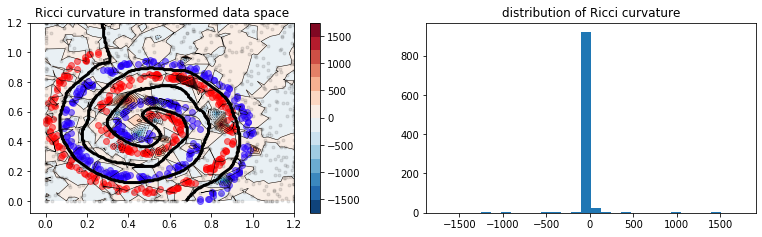

In [38]:
model = get_model4(activation='selu', layer_sizes=[50,100,20,10,10,10,10,2])
fit_plot_model(model, X, y)